# COMP5434 - Tutorial 1: Python and Jupyter

## Jupyter Demo

The next cell will print a message "Hello World".

In [1]:
print("Hello World")

Hello World


The next cell will display the current time.

In [2]:
import time # import the library about time so that Python can use it in the following code
current_time = time.ctime() # call a function ctime() in time library and store the output in a variable called current_time
print(current_time) # print the current time

Fri Sep 20 18:06:02 2024


The data from cells which has been run can be reused in other cells. For example, the next cell can reuse the variable "current_time" which is in the last cell.

Note: If you restart the notebook, the generated data will be cleared.

In [3]:
print(current_time)

Fri Sep 20 18:06:02 2024


## Data Cluster Demo

In this demo, we will use the clutering methods provided by a library scikit-learn (called sklearn in python), to generate clusters for the given data points, and compare the difference between k-means and DBSCAN.

### Import Libraries

In [2]:
import matplotlib.pyplot as plt # import the sub-library pyplot in the library matplotlib, and assign an alias plt.
import numpy as np # import a library called numpy, and assign an alias np.
from sklearn.datasets import make_blobs, make_moons # import two functions make_blobs and make_moons from a sub-library datasets in library sklearn

### Dataset Generation

#### Generate data points in blobs

In [3]:
samples = 300 # the number of data points

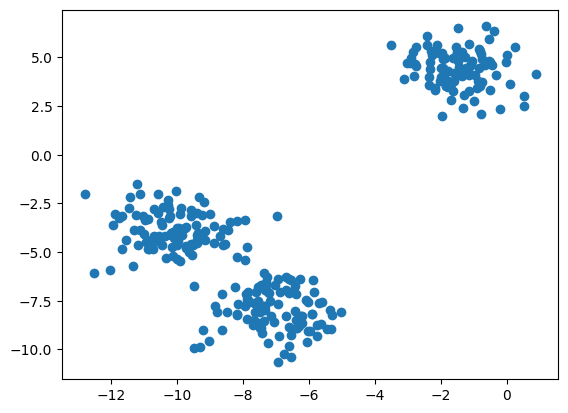

In [4]:
# make_blobs will generate "n_samples" data points with random seed "random_state". The data points will in blob shape.
# It returns two values, x includes the data points, and y_true includes the cluster each data point belongs to
x_blob, y_blob_true = make_blobs(n_samples=samples, random_state=1) 
plt.scatter(x_blob[:, 0], x_blob[:, 1]) 

#### Generate data points in moons

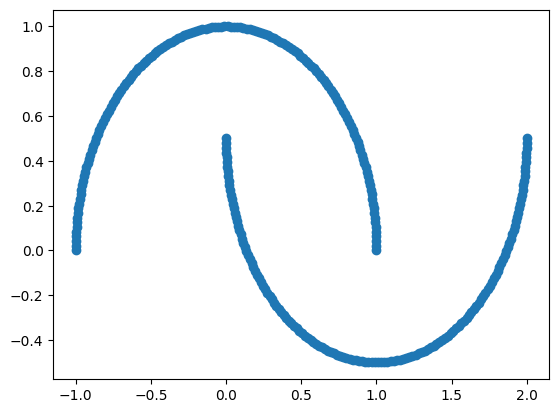

In [7]:
# make_moons will generate "n_samples" data points with random seed "random_state". The data points will in moon shape.
x_moon, y_moon_true = make_moons(n_samples=samples, random_state=1)
plt.scatter(x_moon[:, 0], x_moon[:, 1]) 

## Clutering by k-means

We can use the functions provided by the library scikit-learn to cluter the data.

### Import libraries

In [8]:
from sklearn.cluster import KMeans # import KMeans class from the sub-library cluster in scikit-learn

### Clustering for data in blobs

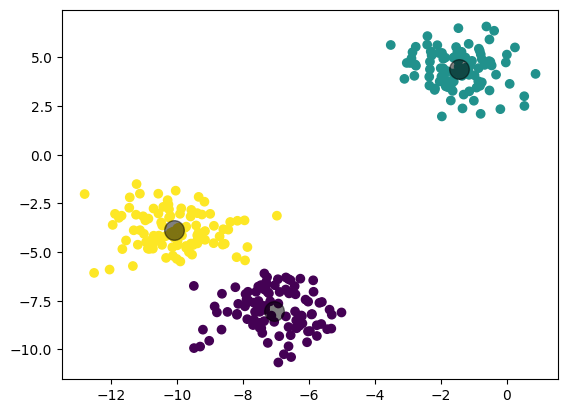

In [9]:
k = 3 # the number of clusters

kmeans = KMeans(n_clusters=k) # initialize a worker which knows "n_cluster" (k) is 3. 
kmeans.fit(x_blob) # load data points and calculate the centroids (stored in "kmeans")

# get the cluster which each data point should belong to (calculated by k_means)
# Note: Function "predict" is to assign the data points to their nearest centroids. 
labels_blob = kmeans.predict(x_blob) 

plt.scatter(x_blob[:, 0], x_blob[:, 1], c=labels_blob)
centers_blob = kmeans.cluster_centers_ # get the centroid
plt.scatter(centers_blob[:, 0], centers_blob[:, 1], c='black', s=200, alpha=0.5) # "s" is the size of centroids in the graph, "alpha" is the opacity

### Clustering for data in moons

However, kmeans does not work well for data points in non-convex shapes, such as data points in moons.

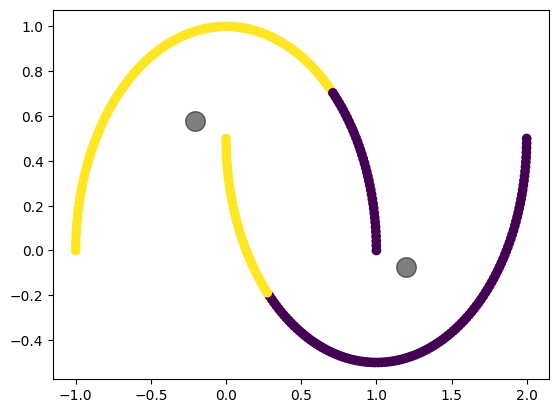

In [10]:
k = 2 # the number of clusters

kmeans = KMeans(n_clusters=k) # initialize a worker which knows "n_cluster" (k) is 3. 
kmeans.fit(x_moon) # load data points and calculate the centroids (stored in "kmeans")

# get the cluster which each data point should belong to (calculated by k_means)
# Note: Function "predict" is to assign the data points to their nearest centroids. 
labels_moon = kmeans.predict(x_moon) 

plt.scatter(x_moon[:, 0], x_moon[:, 1], c=labels_moon) # generate the graph
centers_moons = kmeans.cluster_centers_ # get the centroid
# add centroids to the graph
plt.scatter(centers_moons[:, 0], centers_moons[:, 1], c='black', s=200, alpha=0.5) # "s" is the size of centroids in the graph, "alpha" is the opacity

## Clustering by DBSCAN

DBSCAN can process data points in non-convex shapes very well.

### Import libraries

In [11]:
from sklearn.cluster import DBSCAN # import DBSCAN class from the sub-library cluster in scikit-learn

### Clustering for data in moons

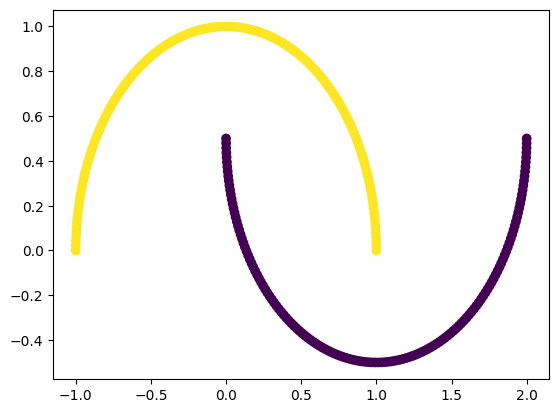

In [12]:
dbscan = DBSCAN(eps=0.3, min_samples=5) # initialize a worker which knows "eps" is 0.3 and "min_samples" is 5. 

labels_moon_dbscan = dbscan.fit_predict(x_moon) # load the data points and assign the data points to their clusters
plt.scatter(x_moon[:, 0], x_moon[:, 1], c=labels_moon_dbscan) # generate the graph